# What is a pivot table?

`A Pivot Table is used to summarise, sort, reorganise, group, count, total or average data stored in a table. It allows us to transform columns into rows and rows into columns. It allows grouping by any field (column), and using advanced calculations on them.`

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
# Total passengers

len(titanic)

891

In [19]:
# Total number of survivers.

myfilter = titanic['survived'] == 1
len(titanic[myfilter])

342

In [21]:
class_group = titanic.groupby('class')

In [25]:
class_group.mean()

# This gives me some info.

# 1. Youngest group was in the 3rd class. around 24 yrs age.
# 2. Biggest percentage of survivers were from the first class.
# 3. Most people in 3rd class were (obviously) travelling alone.

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,0.629630,1.0,38.233441,0.416667,0.356481,84.154687,0.550926,0.504630
Second,0.472826,2.0,29.877630,0.402174,0.380435,20.662183,0.538043,0.565217
Third,0.242363,3.0,25.140620,0.615071,0.393075,13.675550,0.649695,0.659878


# Pivot Table: Better than grouping.

## Let's see how with some examples.

## DataSet: Titanic

In [28]:
# Que: Find the mean age of survivers in each class

titanic.pivot_table('age', index='survived', columns='class')

# The results show, that:
# Survivers of First class were of highest age: 35. Also very young 3rd class passengers survived.

class,First,Second,Third
survived,,,
0,43.695312,33.544444,26.555556
1,35.368197,25.901566,20.646118


In [32]:
# The same conclusion reached in another way.

titanic.pivot_table('age', index='class', columns='survived')

survived,0,1
class,,
First,43.695312,35.368197
Second,33.544444,25.901566
Third,26.555556,20.646118


In [33]:
# Que: Find the average AGE of male and female travelling.

titanic.pivot_table('age', index='sex', columns='class')

# Results show that:
# Highest avg age of passengers was in 1st class : 41
# Youngest was in third: 22

class,First,Second,Third
sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


In [37]:
# Que: What is the survivor ratio of males & females by class.

titanic.pivot_table('survived', index='sex', columns='class')

# Results show that:

# Most females survived. Almost all from 1st class and 50% of 3rd class.
# Men were not so lucky. A max of 36% of 1st class male passengers survived.
# Just 15 & 13% of 2nd and 3rd class passengers respectively survived.

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [41]:
# Que: Find the count of passengers by class as per their embarking town.

# Note: This solution is also an example of the 'aggfunc' keyword usage. By default, it's value is 'mean'.
# Choices are: 'sum', 'mean', 'count', 'min', 'max', etc.

titanic.pivot_table('sex', index='embark_town', columns='class', aggfunc='count')

class,First,Second,Third
embark_town,,,
Cherbourg,85,17,66
Queenstown,2,3,72
Southampton,127,164,353


In [54]:
survived_by_town_and_class = titanic.pivot_table('survived', index='embark_town', columns='class', aggfunc='sum')
survived_by_town_and_class

class,First,Second,Third
embark_town,,,
Cherbourg,59,9,25
Queenstown,1,2,27
Southampton,74,76,67


In [50]:
# Que: How many people survived as per travelling class and what was their mean age.

titanic.pivot_table(index='sex', columns='class', aggfunc={'survived':'count', 'age': 'mean'})

age                       survived             
class       First     Second      Third    First Second Third
sex                                                          
female  34.611765  28.722973  21.750000       94     76   144
male    41.281386  30.740707  26.507589      122    108   347

### At times, we can also show a total for each row using the 'margin' bool arg.

#### An 'All' column shows the total.

In [58]:
titanic.pivot_table('survived', index='embark_town', columns='class', aggfunc='count', margins=True)

class,First,Second,Third,All
embark_town,,,,
Cherbourg,85,17,66,168
Queenstown,2,3,72,77
Southampton,127,164,353,644
All,214,184,491,889


## Dataset: BirthRate Data

In [61]:
births = pd.read_csv('csv/births.csv')

In [62]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [76]:
# Que: Get the number of births by gender per decade


births['decade'] = 10 * (births['year'] // 10)
births.pivot_table(index='decade', columns='gender', aggfunc={'births':['sum', 'mean']})

# The results show:
# Male births for each decade are higher than females.

births                                       
                 mean                        sum            
gender              F              M           F           M
decade                                                      
1960      4566.755208    4808.781250   1753634.0   1846572.0
1970      4267.403569    4497.386393  16263075.0  17121550.0
1980      5460.886072    5740.886635  18310351.0  19243452.0
1990    162328.783333  170171.275000  19479454.0  20420553.0
2000    168789.898148  176911.370370  18229309.0  19106428.0

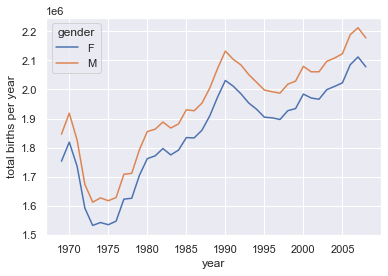

In [77]:
# Lets plot the above results.

%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');